In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt 
import shapely
from shapely.geometry import LineString, Point, Polygon
import time
from scipy import spatial
import os
import pandas as pd


# Creating a DataFrame from .csv file
meas_df = pd.read_csv('./content/merge-1011.csv', sep=",")



print(meas_df)




    IR0_cam  IR1_cam  IR2_cam  IR3_cam  IR0_meas  IR1_meas  IR2_meas  IR3_meas
0     12.23     0.21    16.23    14.23     939.0     241.0     347.0     279.0
1     12.23     2.21    16.23    12.23     938.0     233.0     341.0     266.5
2     12.23     4.22    16.24    10.23     931.0     231.0     332.5     283.0
3     12.23     6.22    16.23     8.22     918.0     235.5     324.5     295.5
4     12.21     8.20    16.21     6.20     774.0     241.0     325.0     352.5
..      ...      ...      ...      ...       ...       ...       ...       ...
94    20.23     8.21     8.21     6.21     655.0     531.0     208.0     429.5
95    20.44     6.31     8.33     8.33     927.0     515.0     212.0     278.0
96    12.20     8.20    16.20     6.20     682.0     252.0     339.0     469.0
97    12.64    10.59    16.74     4.45     585.0     262.0     321.0     659.0
98    10.47     8.43    18.60     6.40     769.0     223.0     426.0     349.0

[99 rows x 8 columns]


           IR0_cam   IR1_cam   IR2_cam   IR3_cam  IR0_meas  IR1_meas  \
IR0_cam   1.000000 -0.016118 -0.873389 -0.041782  0.114018  0.773435   
IR1_cam  -0.016118  1.000000 -0.107769 -0.652517 -0.944437 -0.008685   
IR2_cam  -0.873389 -0.107769  1.000000 -0.128933  0.022174 -0.861777   
IR3_cam  -0.041782 -0.652517 -0.128933  1.000000  0.560356  0.154347   
IR0_meas  0.114018 -0.944437  0.022174  0.560356  1.000000  0.065341   
IR1_meas  0.773435 -0.008685 -0.861777  0.154347  0.065341  1.000000   
IR2_meas -0.875817 -0.039410  0.804293 -0.032913 -0.032516 -0.550577   
IR3_meas -0.105552  0.645334  0.179567 -0.807512 -0.653379 -0.170018   

          IR2_meas  IR3_meas  
IR0_cam  -0.875817 -0.105552  
IR1_cam  -0.039410  0.645334  
IR2_cam   0.804293  0.179567  
IR3_cam  -0.032913 -0.807512  
IR0_meas -0.032516 -0.653379  
IR1_meas -0.550577 -0.170018  
IR2_meas  1.000000  0.163624  
IR3_meas  0.163624  1.000000  


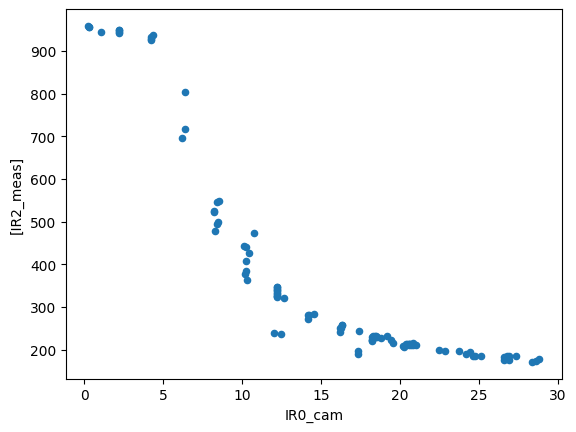

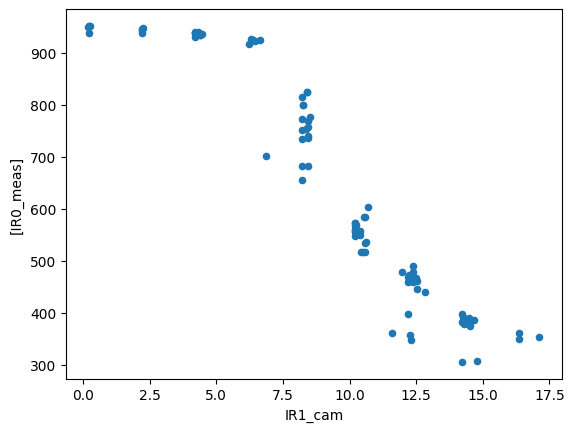

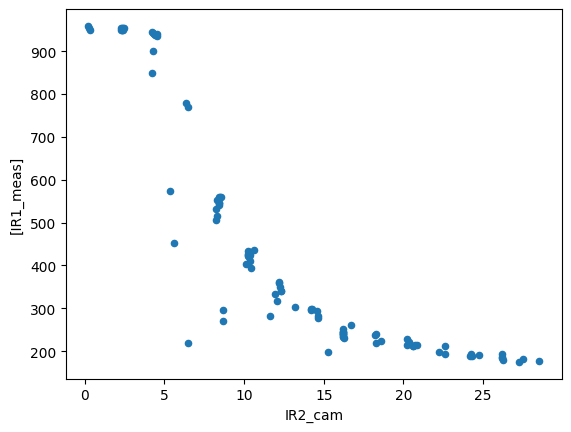

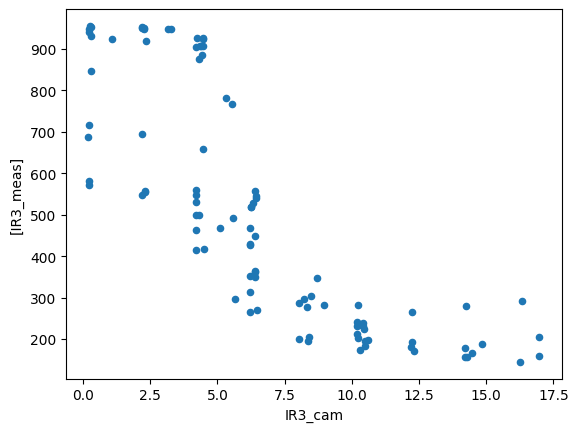

In [2]:
meas_df.plot(x="IR0_cam", y=["IR2_meas"],kind ="scatter")
meas_df.plot(x="IR1_cam", y=["IR0_meas"],kind ="scatter")
meas_df.plot(x="IR2_cam", y=["IR1_meas"],kind ="scatter")
meas_df.plot(x="IR3_cam", y=["IR3_meas"],kind ="scatter")
corrM = meas_df.corr()
print(corrM)